In [1]:
import pandas as pd
import numpy as np

In [2]:
df_final = pd.read_csv("C://Users//JCCLI//Downloads//cust_seg_modeled.csv")

In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746563 entries, 0 to 746562
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    746563 non-null  int64  
 1   Saving account           746563 non-null  int64  
 2   Guarantees               746563 non-null  int64  
 3   Current account          746563 non-null  int64  
 4   Derivada account         746563 non-null  int64  
 5   Payroll account          746563 non-null  int64  
 6   Junior account           746563 non-null  int64  
 7   Most particular account  746563 non-null  int64  
 8   Particular account       746563 non-null  int64  
 9   Particular plus account  746563 non-null  int64  
 10  Short-term deposits      746563 non-null  int64  
 11  Medium-term deposits     746563 non-null  int64  
 12  Long-term deposits       746563 non-null  int64  
 13  e-account                746563 non-null  int64  
 14  Fund

In [6]:
group_1 = df_final[df_final["Clusters"] == 0]
group_2 = df_final[df_final["Clusters"] == 1]
group_3 = df_final[df_final["Clusters"] == 2]
group_4 = df_final[df_final["Clusters"] == 3]
group_5 = df_final[df_final["Clusters"] == 4]

In [19]:
df_final["Province name"].describe()

count    746563.000000
mean         25.576592
std          12.760480
min           0.000000
25%          16.000000
50%          28.000000
75%          29.000000
max          49.000000
Name: Province name, dtype: float64

In [7]:
group_1.Guarantees.describe()

count    188173.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Guarantees, dtype: float64

In [12]:
group_1.total_products.describe()

count    188173.000000
mean          1.612792
std           0.856288
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: total_products, dtype: float64

In [8]:
group_2.Guarantees.describe()

count    177876.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Guarantees, dtype: float64

In [13]:
group_2.total_products.describe()

count    177876.000000
mean          1.010648
std           0.144379
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: total_products, dtype: float64

In [9]:
group_3.Guarantees.describe()

count    159252.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Guarantees, dtype: float64

In [14]:
group_3.total_products.describe()

count    159252.000000
mean          1.063032
std           0.553107
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: total_products, dtype: float64

In [10]:
group_4.Guarantees.describe()

count    77426.000000
mean         0.000336
std          0.018322
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Guarantees, dtype: float64

In [15]:
group_4.total_products.describe()

count    77426.000000
mean         5.826389
std          1.815694
min          2.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         15.000000
Name: total_products, dtype: float64

In [11]:
group_5.Guarantees.describe()

count    143836.000000
mean          0.000042
std           0.006459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Guarantees, dtype: float64

Group 1: 
No Guarantees
No more than 8 total products
Not including 1 city

Group 2:
No Saving Account
No Guarantees
No Derivada account
No Pensions_1
No Mortage
No more than 4 total products
Employee Index not including B (ex employed), or A (active)
Seniority less than 200 months

Group 3: 
No Guarantees
No more than 6 total products
Not including 2 cities


Group 4:
2 or more products
Not including 1 city

Group 5:
No Junior Account
No more than 11 total products
Not including 2 cities
Ages 21, 20, 19 not included
Channels KHE and KHK not included

In [3]:
df_final['Age group'].value_counts().head(10)

2    316108
0    187259
1    122113
3     75756
4     45327
Name: Age group, dtype: int64

In [7]:
df_final['Sex'].value_counts().head(10)

0    422841
1    323722
Name: Sex, dtype: int64

In [6]:
def Age_Range(x):
    if x== 2:
        return '41-65'
    elif x==0:
        return '21-30'
    elif x==1:
        return '30-40'
    elif x==3:
        return '>65'
    else:
        return 'Less than 21'
df_final['Age Demographic Group'] = df_final['Age group'].apply(Age_Range)

In [8]:
def gender_demographic(x):
    if x==0:
        return 'F'
    else:
        return 'M'
df_final['Gender'] = df_final['Sex'].apply(gender_demographic)

In [10]:
def income_demographic(x):
    if x==0:
        return '$100k-$500k'
    elif x==1:
        return '$30k-$50k'
    elif x==2:
        return '$50k-$100k'
    elif x==3:
        return '> $500k'
    else:
        return '< $30k'
df_final['Income Demographic'] = df_final['Income group'].apply(income_demographic)

In [34]:
def seniority_demographic(x):
    if x == 0:
        return 'Between 0 and 50 months'
    elif x==2:
        return 'Between 151 and 200 months'
    elif x==1:
        return 'Between 101 and 150 months'
    elif x==3:
        return 'Between 51 and 100 months'
    else:
        return 'More than 200 months'
df_final['Seniority Demographic'] = df_final['Seniority group'].apply(seniority_demographic)

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746563 entries, 0 to 746562
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    746563 non-null  int64  
 1   Saving account           746563 non-null  int64  
 2   Guarantees               746563 non-null  int64  
 3   Current account          746563 non-null  int64  
 4   Derivada account         746563 non-null  int64  
 5   Payroll account          746563 non-null  int64  
 6   Junior account           746563 non-null  int64  
 7   Most particular account  746563 non-null  int64  
 8   Particular account       746563 non-null  int64  
 9   Particular plus account  746563 non-null  int64  
 10  Short-term deposits      746563 non-null  int64  
 11  Medium-term deposits     746563 non-null  int64  
 12  Long-term deposits       746563 non-null  int64  
 13  e-account                746563 non-null  int64  
 14  Fund

In [36]:
df_final = df_final.drop(['Employee index','Age group','Income group','Seniority group','Activity index','Country'\
                          ,'New customer index', 'Foreigner index','Customer relation type'],axis=1)

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746563 entries, 0 to 746562
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    746563 non-null  int64  
 1   Saving account           746563 non-null  int64  
 2   Guarantees               746563 non-null  int64  
 3   Current account          746563 non-null  int64  
 4   Derivada account         746563 non-null  int64  
 5   Payroll account          746563 non-null  int64  
 6   Junior account           746563 non-null  int64  
 7   Most particular account  746563 non-null  int64  
 8   Particular account       746563 non-null  int64  
 9   Particular plus account  746563 non-null  int64  
 10  Short-term deposits      746563 non-null  int64  
 11  Medium-term deposits     746563 non-null  int64  
 12  Long-term deposits       746563 non-null  int64  
 13  e-account                746563 non-null  int64  
 14  Fund

In [11]:
def channel(x):
    if x==0:
        return 'KAA'
    elif x==1:
        return 'KAB'
    elif x==2:
        return 'KAG'
    elif x==3:
        return 'KAS'
    elif x==4:
        return 'KAT'
    elif x==5:
        return 'KAY'
    elif x==6:
        return 'KFA'
    elif x==7:
        return 'KFC'
    elif x==8:
        return 'KHE'
    else:
        return 'KHK'
df_final['Marketing Channel'] = df_final['Channel'].apply(channel)

In [15]:
df_final['Country'].value_counts().head(10)

0    746563
Name: Country, dtype: int64

In [14]:
df_final['Province name'].value_counts().head(23)

28    297536
7      71282
41     33729
46     33259
29     20440
49     19817
31     18625
16     18189
1      15414
10     15307
3      13934
47     12976
36     12438
35     11371
20      9805
45      9749
5       9674
15      8091
38      8033
11      7800
9       6638
22      6520
14      6462
Name: Province name, dtype: int64

In [ ]:
#df_final['Channel'].value_counts().head(10)
# 0 = KAA
# 1 = KAB
# 2 = KAG
# 3 = KAS
# 4 = KAT
# 5 = KAY
# 6 = KFA
# 7 = KFC
# 8 = KHE
# 9 = KHK

In [9]:
df_final.head()

,index,Saving account,Guarantees,Current account,Derivada account,Payroll account,Junior account,Most particular account,Particular account,Particular plus account,...,Deceased index,Province name,Activity index,Income,Age group,Income group,Seniority group,Clusters,Age Demographic Group,Gender
0,0,0,0,1,0,0,0,0,0,1,...,0,28,1,326124.90,2,0,4,4,41-65,F
1,0,0,0,1,0,0,0,0,0,1,...,0,28,1,326124.90,2,0,4,4,41-65,F
2,1,0,0,0,0,1,0,0,0,1,...,0,28,1,71461.20,2,2,4,3,41-65,F
3,1,0,0,0,0,1,0,0,0,1,...,0,28,1,71461.20,2,2,4,3,41-65,F
4,2,0,0,0,0,1,0,0,0,0,...,0,28,1,430477.41,2,0,4,3,41-65,M


In [45]:
df_final = df_final.drop(['Province name'],axis=1)

In [46]:
df_province = pd.read_csv("C://Users//JCCLI//Downloads//cust_seg_provinces.csv")

In [47]:
df_province.head(10)

,Province name
0,MADRID
1,MADRID
2,MADRID
3,MADRID
4,MADRID
5,MADRID
6,MADRID
7,MADRID
8,MADRID
9,MADRID


In [48]:
# Merge final dataset
final_df = pd.concat([df_final,df_province], axis = 1, join = "outer")

In [42]:
import seaborn as sns

In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746563 entries, 0 to 746562
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    746563 non-null  int64  
 1   Saving account           746563 non-null  int64  
 2   Guarantees               746563 non-null  int64  
 3   Current account          746563 non-null  int64  
 4   Derivada account         746563 non-null  int64  
 5   Payroll account          746563 non-null  int64  
 6   Junior account           746563 non-null  int64  
 7   Most particular account  746563 non-null  int64  
 8   Particular account       746563 non-null  int64  
 9   Particular plus account  746563 non-null  int64  
 10  Short-term deposits      746563 non-null  int64  
 11  Medium-term deposits     746563 non-null  int64  
 12  Long-term deposits       746563 non-null  int64  
 13  e-account                746563 non-null  int64  
 14  Fund

<AxesSubplot:xlabel='Province name', ylabel='count'>

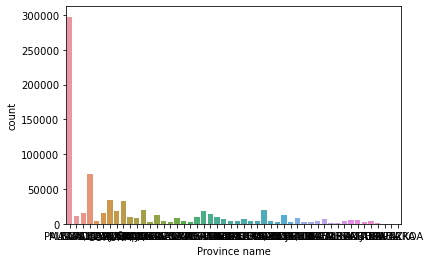

In [50]:
sns.countplot(x='Province name',data=final_df)

In [40]:
final_df.head()

,index,Saving account,Guarantees,Current account,Derivada account,Payroll account,Junior account,Most particular account,Particular account,Particular plus account,...,Income Demographic,Marketing Channel,Country name,Employee Index,New Customer Index,Customer Relation Type,Foreigner Index,Activity Index,Seniority Demographic,Province name
0,0,0,0,1,0,0,0,0,0,1,...,$100k-$500k,KAT,Spain,A,Not Registered last 6 months,A,N,Active,More than 200 months,MADRID
1,0,0,0,1,0,0,0,0,0,1,...,$100k-$500k,KAT,Spain,A,Not Registered last 6 months,A,N,Active,More than 200 months,MADRID
2,1,0,0,0,0,1,0,0,0,1,...,$50k-$100k,KAT,Spain,F,Not Registered last 6 months,A,N,Active,More than 200 months,MADRID
3,1,0,0,0,0,1,0,0,0,1,...,$50k-$100k,KAT,Spain,F,Not Registered last 6 months,A,N,Active,More than 200 months,MADRID
4,2,0,0,0,0,1,0,0,0,0,...,$100k-$500k,KAT,Spain,A,Not Registered last 6 months,A,N,Active,More than 200 months,MADRID


In [17]:
def country(x):
    if x == 0:
        return "Spain"
    else:
        pass
df_final["Country name"] = df_final["Country"].apply(country)

In [18]:
def employee_index(x):
    if x==3:
        return 'N'
    elif x==1:
        return 'B'
    elif x==2:
        return 'A'
    elif x==0:
        return 'F'
    else:
        return 'S'
df_final['Employee Index'] = df_final['Employee index'].apply(employee_index)

In [20]:
def new_cust_index(x):
    if x==0:
        return 'Not Registered last 6 months'
    else:
        return 'Registered last 6 months'
df_final['New Customer Index'] = df_final['New customer index'].apply(new_cust_index)

In [23]:
def cust_relation_type(x):
    if x==0:
        return 'A'
    else:
        return 'I'
df_final['Customer Relation Type'] = df_final['Customer relation type'].apply(cust_relation_type)

In [26]:
def foreigner(x):
    if x ==0:
        return 'N'
    else:
        return 'S'
df_final['Foreigner Index'] = df_final['Foreigner index'].apply(foreigner)

In [28]:
def deceased(x):
    if x==0:
        return 'N'
    else:
        return 'S'
df_final['Deceased index'] = df_final['Deceased index'].apply(deceased)

In [30]:
def activity(x):
    if x==1:
        return 'Active'
    else:
        return 'Inactive'
df_final['Activity Index'] = df_final['Activity index'].apply(activity)

In [29]:
df_final['Activity index'].value_counts().head(10)

1    427429
0    319134
Name: Activity index, dtype: int64

In [19]:
df_final['New customer index'].value_counts().head(10)

0    746332
1       231
Name: New customer index, dtype: int64

In [11]:
final_df.head()

,index,Saving account,Guarantees,Current account,Derivada account,Payroll account,Junior account,Most particular account,Particular account,Particular plus account,...,Province name,Activity index,Income,Age group,Income group,Seniority group,Clusters,Segment group,Province name,Country name
0,0,0,0,1,0,0,0,0,0,1,...,28,1,326124.90,2,0,4,4,21 and older with no more than 11 products,MADRID,Spain
1,0,0,0,1,0,0,0,0,0,1,...,28,1,326124.90,2,0,4,4,21 and older with no more than 11 products,MADRID,Spain
2,1,0,0,0,0,1,0,0,0,1,...,28,1,71461.20,2,2,4,3,Most purchases,MADRID,Spain
3,1,0,0,0,0,1,0,0,0,1,...,28,1,71461.20,2,2,4,3,Most purchases,MADRID,Spain
4,2,0,0,0,0,1,0,0,0,0,...,28,1,430477.41,2,0,4,3,Most purchases,MADRID,Spain


In [51]:
final_df.to_csv('C://Users//JCCLI//Downloads//Customer_Segmentation_Final.csv', index=False, header=True)

In [33]:
import xlsxwriter

In [32]:
pip install xlsxwriter

<AxesSubplot:xlabel='Income Demographic', ylabel='count'>

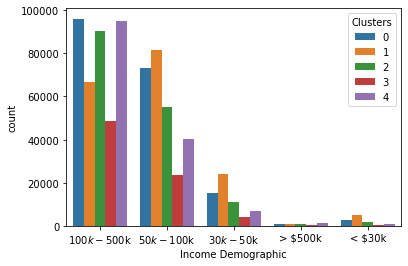

In [54]:
sns.countplot(x='Income Demographic',hue='Clusters',data=final_df)

In [55]:
final_df_cluster_1 = final_df[final_df['Clusters']==0]

In [ ]:
fin

In [57]:
import matplotlib.pyplot as plt

(array([52829., 20370., 33605., 37263., 18763., 11073.,  7045.,  3718.,
         2092.,  1415.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <BarContainer object of 10 artists>)

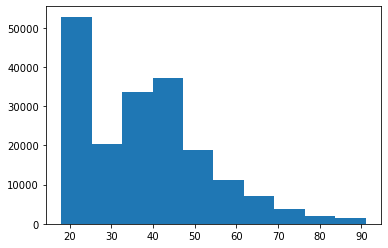

In [58]:
plt.hist(x='Age',data=final_df_cluster_1)

In [53]:
final_df['Clusters'] = final_df['Clusters'].astype('category')